# Music Recommendation System #

## Load Packages ##

In [8]:
# process & visualize data 
import numpy as np
import pandas as pd
import itertools
import gc
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# inspect data
import missingno as msno

np.random.seed(0)

## Load Data ##

In [9]:
data_dir = "/home/lee/Documents/DatasetsForGitHub/kaggle_kkbox_music_recommendation_challenge/"

df_train = pd.read_csv(data_dir + "train.csv")
df_songs = pd.read_csv(data_dir + 'songs.csv')
df_members = pd.read_csv(data_dir + 'members.csv')
df_test = pd.read_csv(data_dir + "test.csv")

## Inspect Data ##

In [10]:
def look_at_dataset(df):

    print("dataframe shape: {}".format(df.shape))
    print("\n")

    print("preview data: \n")
    for i in list(range(0, len(df.columns), 8)):
        print(df.iloc[0:5, i:i+8])
    print("\n")

    print("summarize data: \n")
    for i in list(range(0, len(df.columns), 8)):
        print(df.iloc[:, i:i+8].describe())

In [11]:
# look_at_dataset(df_train)
# look_at_dataset(df_songs)
# look_at_dataset(df_members)

### Check Missing ###

In [12]:
def visual_check_missing(df):
    msno.matrix(df, sparkline=True, labels=True)
    # msno.heatmap(df)

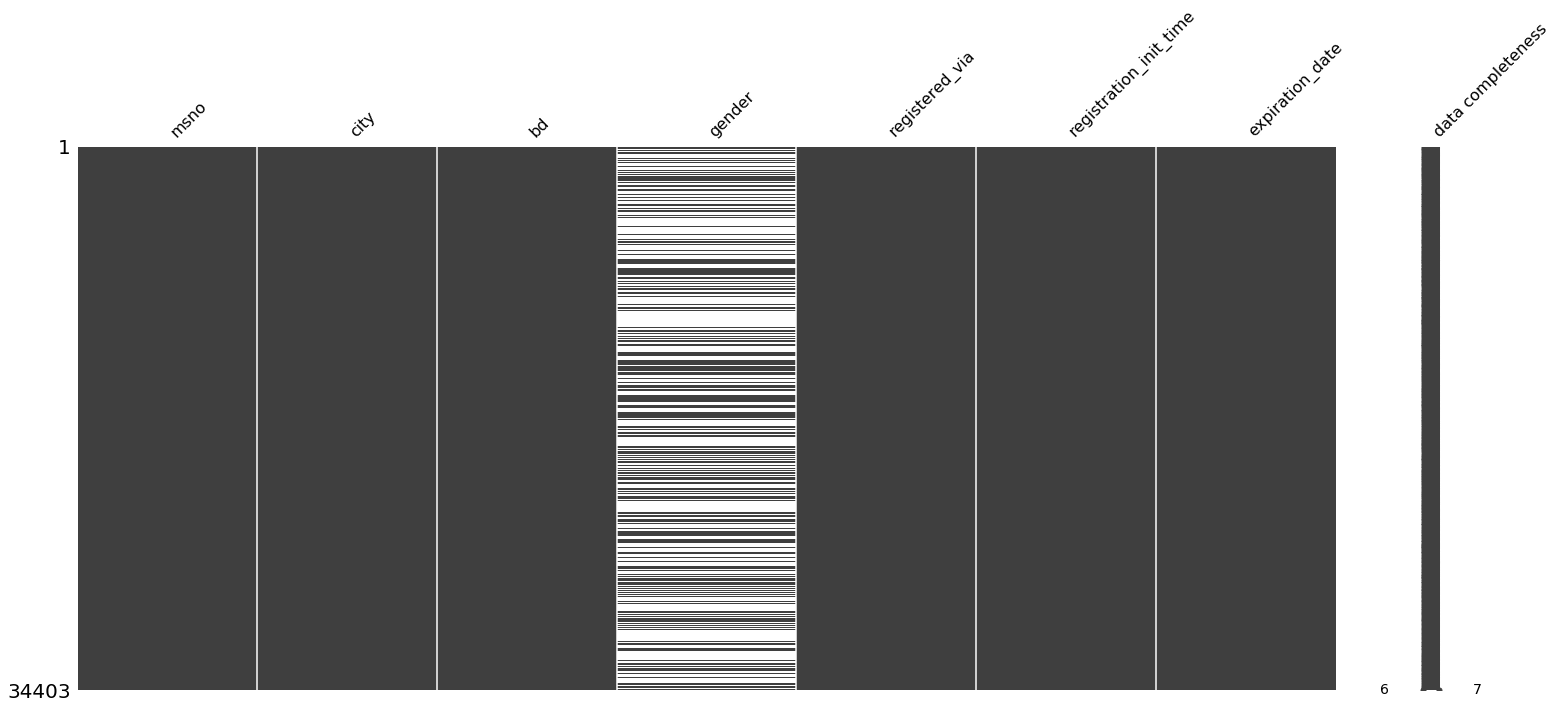

In [13]:
visual_check_missing(df_members)

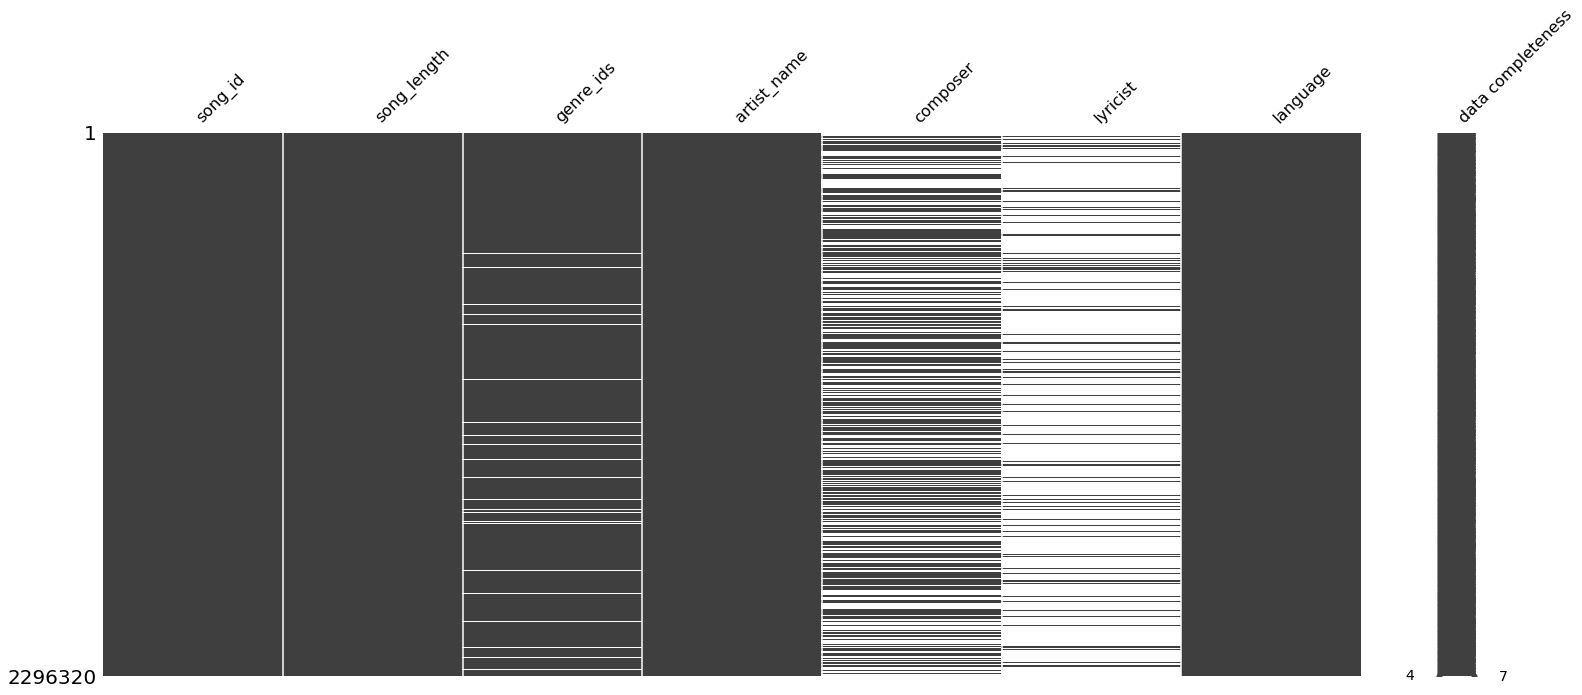

In [14]:
visual_check_missing(df_songs)

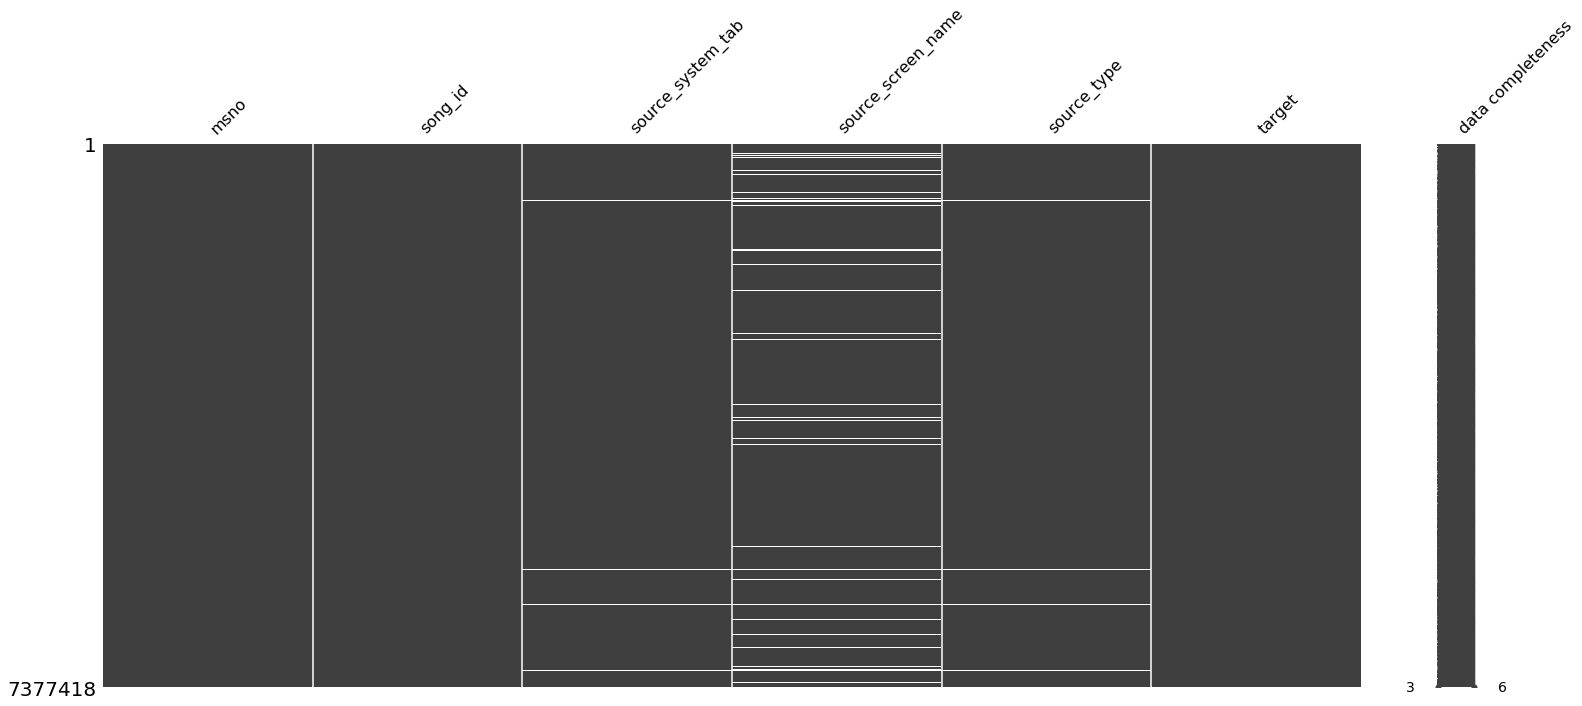

In [15]:
visual_check_missing(df_train)

**Songs in training data that are not in song master list**

In [16]:
df_train[~df_train['song_id'].isin(df_songs['song_id'])]

,msno,song_id,source_system_tab,source_screen_name,source_type,target
17865,32cgPD/BbmvhjjVCmkovSHFfgeMIlUnJe5ILtcTLUr0=,DHq4+axdk09TxwsxUbI+pWdzROsckleX+T1fm7u0/So=,my library,Local playlist more,local-playlist,0
33898,OHRtginG8VMGOkEHIOZIUsI25STd9NFOuOX8kXyDbJM=,OtLPFbGc3Y0JCFRG785mLrpsGAUgMZ1q0XAdqUnl+es=,explore,Explore,album,0
37179,SCxpcNpxlmZgJzUtTTx6R3/7zbcBHhV/ZrTGnhqXME0=,sIstoLt134OfZXyetCoUqBuDas1he9uZot5EkFdp7+o=,my library,Local playlist more,local-library,0
66911,trn8fkzQ8df7uicgIkA9AMnwqETirz77eMTUQNhKH1Q=,3+OBQRyVxirbtD79O0oyj/kVwcq7A8ghJCRs+LoA0ow=,my library,Local playlist more,local-playlist,1
346482,ITiE2zbCjjXoGflqFUa9pbJT35i3eKao4b2tTfyAShQ=,WKCEUOm70//9O7IQ3VE2ohtiJaDGUH7cChanz4plSdA=,my library,Local playlist more,local-playlist,1
384808,BsK6uTnwaTHP+nSJTBrWbblCseJdZ4TKR90HPU7uNg0=,a0S959XXxdHq02RRyJIYYysamjxwJNmoCnkadrWVrjA=,my library,Album more,album,0
603743,Os2AqQn51gs+Z/nl28XPFwTR2o0Qsro2QAvwGIbZYLc=,o6G9PiWV55Shat8JNnNUp5IsK4U+dKQEg05PgSt4GZc=,my library,Local playlist more,local-library,0
739046,aHL+SJaFXhVun0zqx5e5EVq6clEBNZmqpWv5DZFouMk=,Kp8wT5LyqPU9Gj6bhMyzxxWzvtOnM4hyKSke+KBMQS4=,search,Search,online-playlist,0
777679,BF97sQNyf77oqUSZH1SZHvJLbSUqhk88Zv/7BD1/ed8=,WKCEUOm70//9O7IQ3VE2ohtiJaDGUH7cChanz4plSdA=,my library,Local playlist more,local-playlist,1
795767,yBXKYfcmQ+TtIEvkLQXabAY2uwudIGn21dEZYAwCDCg=,bo+kTVU6S1dC0ksT88FZLBUf8ax+jBWL6oOFU4rScEo=,my library,Local playlist more,local-library,1


**Songs in testing data that are not in song master list**

In [17]:
df_test[~df_test['song_id'].isin(df_songs['song_id'])]

,id,msno,song_id,source_system_tab,source_screen_name,source_type
11519,11519,Ym+dCOcuy/7oR4z0OjdPcGJdbo6EC4TKj5BkkLXeQF0=,ddkBkA8RLGf+Xs4OHY5Th0d/UsrNism6qGTbJk6zvyI=,my library,Local playlist more,local-library
28568,28568,qPFwNxuXJ2pH0Eq2GclTYXgMSfZXjPomf4+gKz2c8zo=,a0S959XXxdHq02RRyJIYYysamjxwJNmoCnkadrWVrjA=,my library,Album more,album
310005,310005,uQvuj9Ka8/SVPhV7fFB8bt2upI/7p+PmdtD2lwk61ls=,qyNvb6FcYM803FBKEdYh7iFLi63FjpepHGkUCD7HB7w=,my library,Local playlist more,local-library
407244,407244,66YgVN3SwlLuvSDkQdaNFz5ylCHbdmHbceQuWopPT3M=,SxekcRFJ/l4MWpWZhkTsEfD0bLRpqAGZ1Y2Ed1tJ3DY=,my library,Local playlist more,local-playlist
454868,454868,S/A5GEOI8hXdn17vVHLBLvLtp/UJU6MWH8MrEtCyVnY=,Nbq4EH8j6MPik4oXXsDZNkdP/bZz/7XayxWVBMzd308=,search,Online playlist more,online-playlist
476147,476147,UsCBvxfWk3FNh9cFNDyL9YBPOji2J+Med8K8XLLYZs0=,Nbq4EH8j6MPik4oXXsDZNkdP/bZz/7XayxWVBMzd308=,my library,NaN,top-hits-for-artist
589260,589260,7ZXkc5u72qDQE8dqQVIaxCfTGEPDF1Ak8R+YWkzl6jI=,q56DHVHETlI2i23Uol52mIH04w1Vk7M9ObL8BBa80pk=,discover,Album more,album
1098335,1098335,QDvq4xn7ZSBkamVnc8nL672oxKVqcR2zdgRGQf0giXs=,Nbq4EH8j6MPik4oXXsDZNkdP/bZz/7XayxWVBMzd308=,discover,NaN,top-hits-for-artist
1291644,1291644,nlXm0mLxAnjr+KUK8NHxHsts3K0PAJBQoeTR49OwzNE=,Nbq4EH8j6MPik4oXXsDZNkdP/bZz/7XayxWVBMzd308=,search,Search,song
1355921,1355921,px8eWjJqSqveznpopEtVWYhghz+wXqA6jqfy/IJmZ0g=,Dh1uPET9CjT916QXnHI1oUhnwB306jFJ/xemOyU+LYs=,my library,My library,local-library


Users are able to play music they obtain outside kkbox; therefore kkbox's database does not have metadata on these songs. We need a separate process to make predictions on these songs. 